<a href="https://colab.research.google.com/github/quilaztlia/machine-learning-zoomcamp/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://courses.datatalks.club/ml-zoomcamp-2025/

In [5]:
import pandas as pd

file = pd.read_csv('car_fuel_efficiency.csv');

dataset = file.filter(items =['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'])




<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

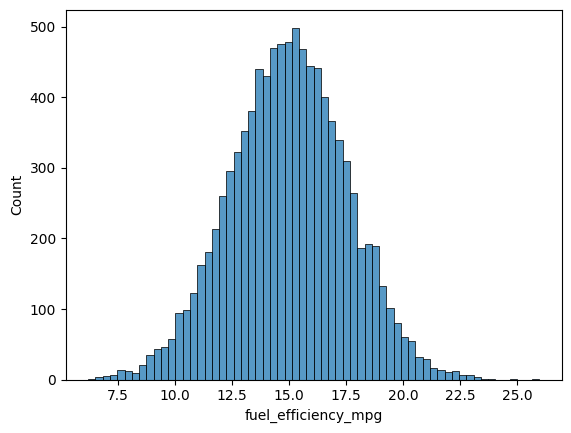

In [6]:
#EDA: Look at the fuel_efficiency_mpg variable. Does it have a long tail?
import seaborn as sn

sn.histplot(dataset['fuel_efficiency_mpg'])

In [7]:
#Question 1: There's one column with missing values. What is it?
# horsepower
print(dataset.info())
print(dataset.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB
None
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [8]:
#Question 2: What's the median (50% percentile) for variable 'horsepower'?
# 149

import statistics as stat
import numpy as np

print(np.nanmedian(dataset['horsepower']))
print(stat.median(dataset['horsepower']))
print(dataset.describe())

149.0
165.0
       engine_displacement   horsepower  vehicle_weight   model_year  \
count          9704.000000  8996.000000     9704.000000  9704.000000   
mean            199.708368   149.657292     3001.280993  2011.484027   
std              49.455319    29.879555      497.894860     6.659808   
min              10.000000    37.000000      952.681761  2000.000000   
25%             170.000000   130.000000     2666.248985  2006.000000   
50%             200.000000   149.000000     2993.226296  2012.000000   
75%             230.000000   170.000000     3334.957039  2017.000000   
max             380.000000   271.000000     4739.077089  2023.000000   

       fuel_efficiency_mpg  
count          9704.000000  
mean             14.985243  
std               2.556468  
min               6.200971  
25%              13.267459  
50%              15.006037  
75%              16.707965  
max              25.967222  


In [9]:
#Prepare and split the dataset
#Shuffle the dataset (the filtered one you created above), use seed 42.
#Split your data in train/val/test sets, with 60%/20%/20% distribution.##
n = len(dataset)
print(n)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
print(n_val ,  n_test, n_train)

9704
1940 1940 5824


In [31]:
np.random.seed(42)

idx = np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

dt_train = dataset.iloc[idx[:  n_train]]
dt_val = dataset.iloc[idx[n_train:n_train + n_val]]
dt_test = dataset.iloc[idx[n_train + n_val:]]

y_train_orig = dt_train['fuel_efficiency_mpg'].values
y_val_orig = dt_val['fuel_efficiency_mpg'].values
y_test_orig = dt_test['fuel_efficiency_mpg'].values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del dt_train['fuel_efficiency_mpg']
del dt_val['fuel_efficiency_mpg']
del dt_test['fuel_efficiency_mpg']

[   0    1    2 ... 9701 9702 9703]
[ 483 7506 8795 ... 5390  860 7270]


engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64
engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64
3.671000819543139 [ 3.63140955e-06  6.65758686e-04 -3.23242585e-04 -2.14173526e-05]
3.6646662472218297 [ 2.14827083e-06  2.21209296e-04 -3.23460699e-04  1.64673232e-05]
y_pred_mean483     2.904935
7506    2.836149
8795    2.932813
1688    2.553969
6217    3.012672
          ...   
1696    2.878773
5685    2.422431
6735    2.921532
2052    3.002868
1776    2.942877
Length: 5824, dtype: float64
y_pred_zero483     2.909816
7506    2.842787
8795    2.933106
1688    2.531355
6217    3.032078
          ...   
1696    2.885802
5685    2.432427
6735    2.923297
2052    3.003055
1776    2.944049
Length: 5824, dtype: float64


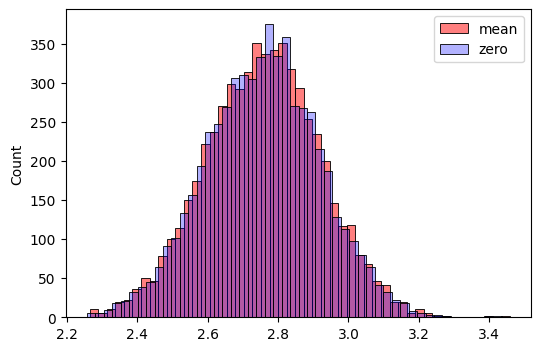

In [32]:
#Question 3
#We need to deal with missing values for the column from Q1.
#We have two options: fill it with 0 or with the mean of this variable.
#For computing the mean, use the training only!
import matplotlib.pyplot as plt
import seaborn as sns
mean = dt_train['horsepower'].mean()

dt_train_mean = dt_train.fillna(mean)
print(dt_train_mean.isnull().sum())

dt_train_zero = dt_train.fillna(0)
print(dt_train_zero.isnull().sum())

#Try both options. For each, train a linear regression model without
#regularization using the code from the lessons.
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

w_0_mean, w_mean = train_linear_regression(dt_train_mean, y_train)
print(w_0_mean, w_mean)

w_0_zero, w_zero = train_linear_regression(dt_train_zero, y_train)
print(w_0_zero, w_zero)

y_pred_mean = w_0_mean + dt_train_mean.dot(w_mean)
print('y_pred_mean' + str(y_pred_mean))

y_pred_zero = w_0_zero + dt_train_zero.dot(w_zero)
print('y_pred_zero' + str(y_pred_zero))

plt.figure(figsize=(6, 4))
sns.histplot(y_pred_mean, label='mean', color='red', alpha=0.5)
sns.histplot(y_pred_zero, label='zero', color='blue', alpha=0.3)
plt.legend()
plt.show()

In [42]:
#Use the validation dataset to evaluate the models and compare the RMSE of each option.
#Round the RMSE scores to 2 decimal digits using round(score, 2)
#Which option gives better RMSE?
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

dt_val_mean = dt_val.fillna(mean)
dt_val_zero = dt_val.fillna(0)


y_pred_mean = w_0_mean + dt_val_mean.dot(w_mean)
y_pred_zero = w_0_zero + dt_val_zero.dot(w_zero)


r_mean =rmse(y_val, y_pred_mean)
r_zero =rmse(y_val, y_pred_zero)

print('RMSE for filling with mean: ' + str(round(r_mean, 2)))
print('RMSE for filling with zero: ' + str(round(r_zero, 2)))

RMSE for filling with mean: 0.04
RMSE for filling with zero: 0.04


In [39]:
#Question 4
#Now let's train a regularized linear regression.

def train_linear_regression_reg(X, y, r=0.0):
  ones = np.ones(X.shape[0])
  X= np.column_stack([ones, X])

  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]


In [43]:
#For this question, fill the NAs with 0.
#Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
#Use RMSE to evaluate the model on the validation dataset.
#Round the RMSE scores to 2 decimal digits.
#Which r gives the best RMSE?
#If multiple options give the same best RMSE, select the smallest r.
dt_train_r = dt_train.fillna(0)
dt_val_r = dt_val.fillna(0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  w_0, w = train_linear_regression_reg(dt_train_r, y_train, r)
  y_pred_r = w_0 + dt_train_r.dot(w)
  error = rmse(y_train, y_pred_r)
  print(r, w_0, round(error, 2))


0 3.6646662472218297 0.04
0.01 3.1688134470074534 0.04
0.1 1.4288369989383432 0.04
1 0.22012861946726972 0.04
5 0.04624885656570121 0.04
10 0.023271722731248758 0.04
100 0.0023413689852701753 0.04


In [51]:
#Question 5
#We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
#Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
#For each seed, do the train/validation/test split with 60%/20%/20% distribution.
#Fill the missing values with 0 and train a model without regularization.
def prepare(dataset, seed, fillna):
  n = len(dataset)
  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)

  n_val = int(n*0.2)
  n_test = int(n*0.2)
  n_train = n - n_val - n_test
  #print(n_val ,  n_test, n_train)

  dt_train = dataset.iloc[idx[:  n_train]]
  dt_val = dataset.iloc[idx[n_train:n_train + n_val]]
  dt_test = dataset.iloc[idx[n_train + n_val:]]

  dt_train = dt_train.fillna(fillna)
  dt_val = dt_val.fillna(fillna)
  dt_test = dt_test.fillna(fillna)

  y_train_orig = dt_train['fuel_efficiency_mpg'].values
  y_val_orig = dt_val['fuel_efficiency_mpg'].values
  y_test_orig = dt_test['fuel_efficiency_mpg'].values

  y_train = np.log1p(y_train_orig)
  y_val = np.log1p(y_val_orig)
  y_test = np.log1p(y_test_orig)

  del dt_train['fuel_efficiency_mpg']
  del dt_val['fuel_efficiency_mpg']
  del dt_test['fuel_efficiency_mpg']

  return dt_train, dt_val, dt_test, y_train, y_val, y_test


In [53]:
#For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
#What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
#Round the result to 3 decimal digits (round(std, 3))
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  dt_train, dt_val, dt_test, y_train, y_val, y_test = prepare(dataset, s, 0)
  w_0, w = train_linear_regression(dt_train, y_train)
  y_pred = w_0 + dt_val.dot(w)
  scores.append(rmse(y_val, y_pred))

print(scores)
print(round(np.std(scores), 3))

[np.float64(0.03801775537087802), np.float64(0.0392788533393729), np.float64(0.039446530525595505), np.float64(0.0387276370388226), np.float64(0.03727535850105433), np.float64(0.039384388339929154), np.float64(0.03890763931346167), np.float64(0.038379716269399816), np.float64(0.040189869753460644), np.float64(0.038607646441269794)]
0.001


In [58]:
#Question 6
#Split the dataset like previously, use seed 9.
#Combine train and validation datasets.
#Fill the missing values with 0 and train a model with r=0.001.
#What's the RMSE on the test dataset?
dt_train, dt_val, dt_test, y_train, y_val, y_test = prepare(dataset, 9, 0)
dt_combined = pd.concat([dt_train, dt_val])
y_combined = np.concatenate([y_train, y_val])

dt_combined.fillna(0, inplace=True)

w_0_combined, w_combined = train_linear_regression_reg(dt_combined, y_combined, 0.001)
y_pred = w_0_combined + dt_combined.dot(w_combined)

print(round(rmse(y_combined, y_pred), 2))

0.04


In [ ]:
#https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2025/02-regression/homework.md#question-1
#https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb
#41 : https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02